# Project 1:NLP

## Part 1

• DOMAIN: 

Digital content management

• CONTEXT: 

Classification is probably the most popular task that you would  deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to 
create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

• DATA DESCRIPTION: 

Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many,industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:

• 8240 "10s" blogs (ages 13-17), 

• 8086 "20s" blogs(ages 23-27) and 

• 2994 "30s" blogs (ages 33-47)
 
For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions.Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link.

• PROJECT OBJECTIVE: 

The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.

 
 





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import re
from matplotlib import pyplot
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [3]:
import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer


In [4]:
df = pd.read_csv('/content/drive/MyDrive/AIML Google Colab/blogtext.csv')

In [5]:
n_s = 30000
mini_data = df.sample(n_s, axis=0, random_state=0)

In [6]:
df1 = df.head(30000)

In [7]:
df1.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [8]:
df1.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [9]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

In [10]:
df2 = df1.drop_duplicates(subset={"id","gender","age","topic","sign","date","text"})

In [11]:
df2.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [12]:
df2.isna().any()

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

In [13]:
df2.shape


(29908, 7)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29908 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      29908 non-null  int64 
 1   gender  29908 non-null  object
 2   age     29908 non-null  int64 
 3   topic   29908 non-null  object
 4   sign    29908 non-null  object
 5   date    29908 non-null  object
 6   text    29908 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.8+ MB


In [15]:
df2.drop(['id','date'], axis=1, inplace=True)

In [16]:
df2.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [17]:
df2['age']=df2['age'].astype('object')


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29908 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  29908 non-null  object
 1   age     29908 non-null  object
 2   topic   29908 non-null  object
 3   sign    29908 non-null  object
 4   text    29908 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [19]:
df2['clean_data']=df1['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))

In [20]:
df2['clean_data']=df2['clean_data'].apply(lambda x: x.lower())


In [21]:
df2['clean_data']=df2['clean_data'].apply(lambda x: x.strip())


In [22]:
print("Actual data=======> {}".format(df1['text'][1]))


Actual data=======>            These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          


In [23]:
print("Cleaned data=======> {}".format(df2['clean_data'][1]))

Cleaned data=======> these are the team members drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering me urllink mail


In [24]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

In [26]:
df2['clean_data']=df2['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [27]:
df2['clean_data'][6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

In [28]:
df2['labels']=df2.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)

In [29]:
df2.head()


,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [30]:
df2=df2[['clean_data','labels']]

In [31]:
df2.head()

,clean_data,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture urls popups means...,"[male, 33, InvestmentBanking, Aquarius]"


In [32]:
X=df2['clean_data']
y=df2['labels']


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vectorizer=CountVectorizer(binary=True, ngram_range=(1,2))

In [35]:
X=vectorizer.fit_transform(X)
X[1]


<1x1871136 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [36]:
vectorizer.get_feature_names()[:10]

['aa',
 'aa aa',
 'aa advert',
 'aa amazing',
 'aa anger',
 'aa batteries',
 'aa class',
 'aa compared',
 'aa damn',
 'aa ended']

In [37]:
label_counts=dict()

for labels in df2.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1


In [38]:
label_counts

{'13': 547,
 '14': 1180,
 '15': 1533,
 '16': 2776,
 '17': 2865,
 '23': 3539,
 '24': 3182,
 '25': 1368,
 '26': 1665,
 '27': 3176,
 '33': 1385,
 '34': 923,
 '35': 2545,
 '36': 1760,
 '37': 184,
 '38': 142,
 '39': 132,
 '40': 183,
 '41': 95,
 '42': 48,
 '43': 55,
 '44': 10,
 '45': 78,
 '46': 204,
 '47': 105,
 '48': 228,
 'Accounting': 63,
 'Advertising': 56,
 'Agriculture': 47,
 'Aquarius': 2852,
 'Architecture': 52,
 'Aries': 6825,
 'Arts': 1119,
 'Automotive': 116,
 'Banking': 99,
 'Biotech': 80,
 'BusinessServices': 217,
 'Cancer': 2368,
 'Capricorn': 1376,
 'Chemicals': 75,
 'Communications-Media': 841,
 'Construction': 28,
 'Consulting': 173,
 'Education': 1128,
 'Engineering': 747,
 'Fashion': 1622,
 'Gemini': 1494,
 'Government': 418,
 'HumanResources': 15,
 'Internet': 1232,
 'InvestmentBanking': 71,
 'Law': 56,
 'LawEnforcement-Security': 89,
 'Leo': 2416,
 'Libra': 1427,
 'Manufacturing': 211,
 'Maritime': 54,
 'Marketing': 354,
 'Military': 27,
 'Museums-Libraries': 194,
 'Non-

In [39]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [40]:
y=binarizer.fit_transform(df2.labels)

accuracy 0.8666666666666667
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

confusion matrix [[2 0]
 [0 3]]


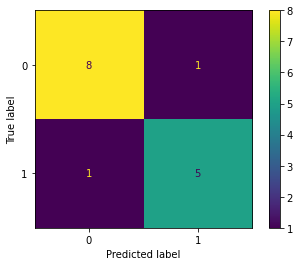

In [41]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
y_pred = pipe.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

a = y_test[:5]
b = y_pred[:5]

print('confusion matrix %s' %metrics.confusion_matrix(a,b))
plot_confusion_matrix(pipe, X_test, y_test)  
plt.show() 

accuracy 0.9333333333333333
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.83      0.91         6

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15

confusion matrix [[2 0]
 [0 3]]


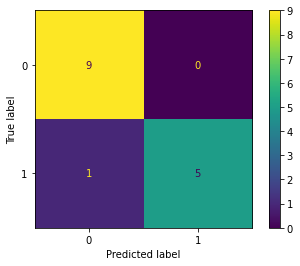

In [42]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

pipe = make_pipeline(StandardScaler(), SGDClassifier())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
y_pred = pipe.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

a = y_test[:5]
b = y_pred[:5]

print('confusion matrix %s' %metrics.confusion_matrix(a,b))
plot_confusion_matrix(pipe, X_test, y_test)  
plt.show() 

accuracy 0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.75      1.00      0.86         6

    accuracy                           0.87        15
   macro avg       0.88      0.89      0.87        15
weighted avg       0.90      0.87      0.87        15

confusion matrix [[2 0]
 [0 3]]


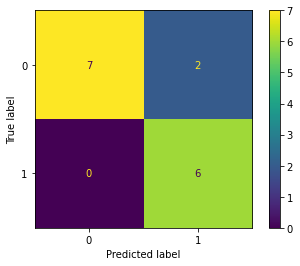

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

pipe = make_pipeline(MinMaxScaler(), MultinomialNB())

#pipe = Pipeline([('vect', CountVectorizer()),
               #('tfidf', TfidfTransformer()),
               #('clf', MultinomialNB()),
              #])
pipe.fit(X_train, y_train)
Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

y_pred = pipe.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

a = y_test[:5]
b = y_pred[:5]

print('confusion matrix %s' %metrics.confusion_matrix(a,b))
plot_confusion_matrix(pipe, X_test, y_test)  
plt.show() 

accuracy 0.7333333333333333
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.75      0.75      0.75         8

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

confusion matrix [[2 0]
 [1 2]]


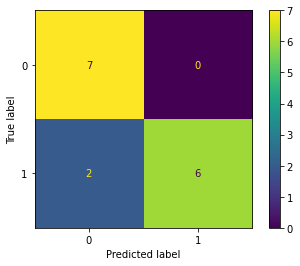

In [44]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
clf.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
y_pred = pipe.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
a = y_test[:5]
b = y_pred[:5]
print('confusion matrix %s' %metrics.confusion_matrix(a,b))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

# Summary
### SGD Classifier gives the highest accuracy
### SGD classifier gives the highest Recall = 1. It means predicts more true positve labels. 
### SGD classifer gives Precision = 0.90. It means 90% of predicted values are true.
### SGD classifer gives F1 score for 0 = 0.95 and 1 - 0.91 which is the highest as compare to other models.

## Finally SGD classifier is the best model.

In [45]:
!pip install nbconvert


In [46]:
!jupyter nbconvert to html Project_1_NLP_part_1.ipynb

[NbConvertApp] WARNING | pattern u'to' matched no files
[NbConvertApp] WARNING | pattern u'html' matched no files
[NbConvertApp] WARNING | pattern u'Project_1_NLP_part_1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    